In [1]:
from manim import *

Manim Community v0.18.0

## NetworkX Teil

In [2]:
import networkx as nx
import matplotlib.pyplot as plt


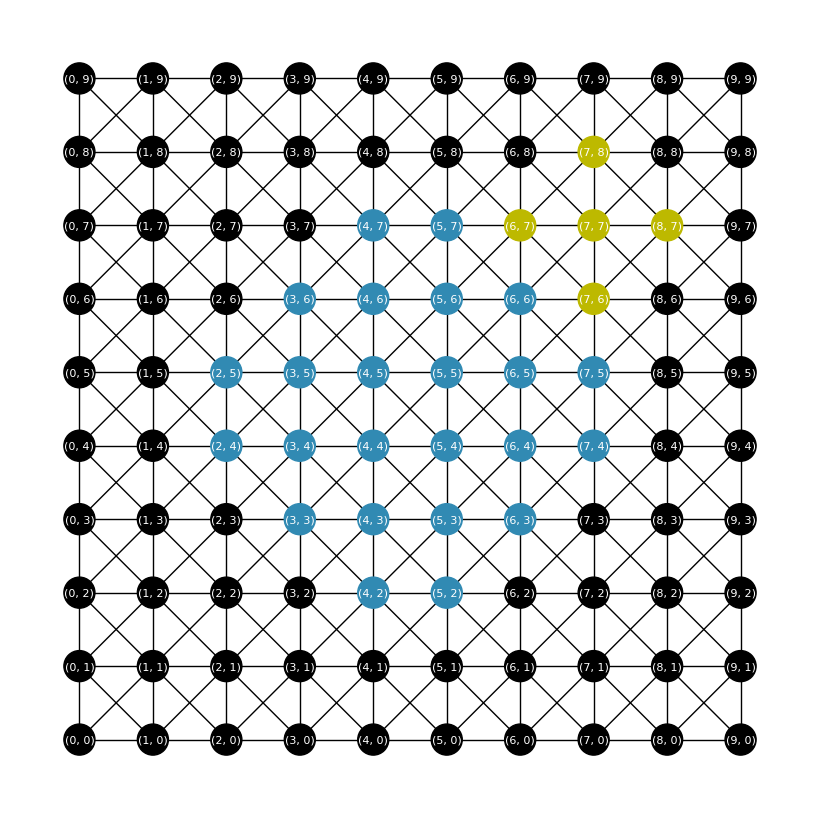

In [3]:
# Create a new graph
G = nx.Graph()

# Add nodes and edges for a 10x10 grid, including diagonal connections
y = 10
x = 10
for i in range(x):
    for j in range(y):
        # Add node
        G.add_node((i, j))

        # Add edges to neighboring nodes (including diagonals)
        if i > 0:
            G.add_edge((i, j), (i - 1, j))  # Edge to the left
            if j > 0:
                G.add_edge((i, j), (i - 1, j - 1))  # Diagonal left-top
            if j < 9:
                G.add_edge((i, j), (i - 1, j + 1))  # Diagonal left-bottom
        if j > 0:
            G.add_edge((i, j), (i, j - 1))  # Edge to the top
        if i < 9:
            G.add_edge((i, j), (i + 1, j))  # Edge to the right
            if j > 0:
                G.add_edge((i, j), (i + 1, j - 1))  # Diagonal right-top
            if j < 9:
                G.add_edge((i, j), (i + 1, j + 1))  # Diagonal right-bottom
        if j < 9:
            G.add_edge((i, j), (i, j + 1))  # Edge to the bottom

# Define positions for the nodes in the graph
pos = {(i, j): (i, j) for i in range(10) for j in range(10)}

# Define nodes for Moon and Earth
moon_nodes = [(7,8), (6,7), (7,7), (8,7), (7,6)]
earth_nodes = [(5,7), (4,7), (3,6), (4,6), (5,6), (6,6), (2,5), (3,5), (4,5), (5,5), (6,5), (7,5), 
               (2,4), (3,4), (4,4), (5,4), (6,4), (7,4), (3,3), (4,3), (5,3), (6,3), (4,2), (5,2)]

# Set colors for each node
node_colors = []
for node in G.nodes():
    if node in moon_nodes:
        node_colors.append('#bdb900')  # Color for Moon
    elif node in earth_nodes:
        node_colors.append('#318ab3')  # Color for Earth
    else:
        node_colors.append('black')  # Default color

# Plot the graph with diagonal connections
plt.figure(figsize=(8, 8))
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='black', font_color='white', node_size=500, font_size=8)
plt.gca().set_facecolor('grey')
plt.show()


In [4]:
config.media_embed = True
config.tex_compiler = "pdflatex"

## Manim


In [5]:
%load_ext manim

The manim module is not an IPython extension.


#### Graph

In [6]:
class GraphScene(Scene):
    def construct(self):
        # Konvertiere die 2D-Koordinaten in 3D-Koordinaten für Manim
        pos_3d = {node: (x, y, 0) for node, (x, y) in pos.items()}

        # Definiere die Farben für jeden Knoten
        node_colors = {node: ('#bdb900' if node in moon_nodes else 
                              '#318ab3' if node in earth_nodes else 
                              '#68228B') for node in G.nodes()}

        # Konfiguration für die Knoten
        vertex_config = {
            node: {"radius": 0.2, "color": node_colors[node]}
            for node in G.nodes()
        }
        
        # Konfiguration für die Kanten
        edge_config = {
            edge: {"stroke_color": "#666666"}
            for edge in G.edges()
        }
        # Erstelle einen Manim-Graphen aus dem networkx-Graphen
        m_graph = Graph(list(G.nodes), list(G.edges), layout=pos_3d, layout_scale=1, labels=False, 
                        vertex_config=vertex_config, edge_config=edge_config)


        # Zentriere den Graphen in der Szene
        m_graph.move_to(ORIGIN)

        # Füge den Graphen zur Szene hinzu
        self.add(m_graph)
        #self.play(Create(m_graph))
        self.wait(2)

In [7]:
%manim -pql GraphScene



[02/06/24 23:45:59] INFO     Animation 0 : Partial movie file written in                   ]8;id=728503;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=600006;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Visualisierung\Graph-Cuts-Animat                         
                             ion\Lukas\media\videos\Lukas\480p15\partial_movie_files\Graph                         
                             Scene\1185818338_634017564_4265839328.mp4'                                            

                    INFO     Combining to Movie file.                                      ]8;id=327984;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=414447;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#617\617]8;;\

                    INFO                                                                   ]8;id=58359;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=692142;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#735\735]8;;\
                             File ready at                                                                         
                             'C:\Users\Adrian\DHBW_Coding\Visualisierung\Graph-Cuts-Animat                         
                             ion\Lukas\media\videos\Lukas\480p15\GraphScene.mp4'                                   
                                                                                                                   

                    INFO     Rendered GraphScene                                                       ]8;id=378962;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=160219;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene.py#241\241]8;;\
                             Played 1 animations                                                                   

[02/06/24 23:46:00] INFO     Previewed File at:                                                     ]8;id=635874;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\utils\file_ops.py\file_ops.py]8;;\:]8;id=11647;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\utils\file_ops.py#227\227]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Visualisierung\Graph-Cuts-Animation\Lukas                
                             \media\videos\Lukas\480p15\GraphScene.mp4'                                            

#### Bild

In [8]:
class ImageScene(Scene):
    def construct(self):
        # Lade das Bild
        image = ImageMobject("../Bilder/Alles.png")

        # Zentriere das Bild in der Szene
        image.move_to(ORIGIN)
        image.scale(1.2)
        # Füge das Bild zur Szene hinzu und spiele die Animation
        self.add(image)
        self.play(FadeIn(image))
        self.wait(2)
        self.play(FadeOut(image))

In [9]:
%manim -pql ImageScene

[02/06/24 23:46:19] INFO     Animation 0 : Partial movie file written in                   ]8;id=801256;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=289699;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Visualisierung\Graph-Cuts-Animat                         
                             ion\Lukas\media\videos\Lukas\480p15\partial_movie_files\Image                         
                             Scene\1185818338_3376166353_3362834651.mp4'                                           

[02/06/24 23:46:20] INFO     Animation 1 : Partial movie file written in                   ]8;id=108940;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=338919;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Visualisierung\Graph-Cuts-Animat                         
                             ion\Lukas\media\videos\Lukas\480p15\partial_movie_files\Image                         
                             Scene\624642324_784179552_3020830449.mp4'                                             

[02/06/24 23:46:21] INFO     Animation 2 : Partial movie file written in                   ]8;id=981553;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=988629;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Visualisierung\Graph-Cuts-Animat                         
                             ion\Lukas\media\videos\Lukas\480p15\partial_movie_files\Image                         
                             Scene\624642324_1690475290_1428998561.mp4'                                            

                    INFO     Combining to Movie file.                                      ]8;id=638373;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=121496;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#617\617]8;;\

                    INFO                                                                   ]8;id=826708;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=115919;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#735\735]8;;\
                             File ready at                                                                         
                             'C:\Users\Adrian\DHBW_Coding\Visualisierung\Graph-Cuts-Animat                         
                             ion\Lukas\media\videos\Lukas\480p15\ImageScene.mp4'                                   
                                                                                                                   

                    INFO     Rendered ImageScene                                                       ]8;id=623919;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=713248;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene.py#241\241]8;;\
                             Played 3 animations                                                                   

[02/06/24 23:46:22] INFO     Previewed File at:                                                     ]8;id=825615;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\utils\file_ops.py\file_ops.py]8;;\:]8;id=919061;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\utils\file_ops.py#227\227]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Visualisierung\Graph-Cuts-Animation\Lukas                
                             \media\videos\Lukas\480p15\ImageScene.mp4'                                            

#### Werte Graph

In [12]:
class TextScene(Scene):
    def construct(self):
        # Erstelle den Text
        text = Text("Which values are asigned to nodes and edges?")

         # Skaliere den Text, um ihn kleiner zu machen
        text.scale(0.5)
        
        # Erstelle drei Punkte
        dot1 = Dot(color='#bdb900').shift(UP)
        dot2 = Dot(color='#318ab3')
        dot3 = Dot(color='#68228B').shift(DOWN)

        # Erstelle Beschriftungen für jeden Punkt
        label1 = Text("🌕(255, 255, 0)").next_to(dot1, RIGHT)
        label2 = Text("🌍(173, 216, 230)").next_to(dot2, RIGHT)
        label3 = Text("🌌(0, 0, 0)").next_to(dot3, RIGHT)
        
        # Füge Punkte und Beschriftungen zur Szene hinzu und spiele die Animation
        #self.add(dot1, dot2, dot3, label1, label2, label3)

        # Zentriere den Text in der Szene und spiele die Animation
        self.play(Write(text))
        self.wait(2)
        # Bewege den Text nach oben als Überschrift
        self.play(text.animate.to_edge(UP))
        
        self.play(FadeIn(dot1), FadeIn(dot2), FadeIn(dot3), Write(label1), Write(label2), Write(label3))
        self.wait(2)
        self.play(dot1.animate.to_edge(LEFT), dot2.animate.to_edge(LEFT), dot3.animate.to_edge(LEFT),
                  label1.animate.to_edge(LEFT), label2.animate.to_edge(LEFT), label3.animate.to_edge(LEFT))

In [13]:
%manim -pql TextScene

[02/06/24 23:58:54] INFO     Animation 0 : Partial movie file written in                   ]8;id=675706;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=102845;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Visualisierung\Graph-Cuts-Animat                         
                             ion\Lukas\media\videos\Lukas\480p15\partial_movie_files\TextS                         
                             cene\1185818338_3464157972_223132457.mp4'                                             

                    INFO     Animation 1 : Partial movie file written in                   ]8;id=438403;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=901045;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Visualisierung\Graph-Cuts-Animat                         
                             ion\Lukas\media\videos\Lukas\480p15\partial_movie_files\TextS                         
                             cene\624642324_1141282389_3434011547.mp4'                                             

[02/06/24 23:58:56] INFO     Animation 2 : Partial movie file written in                   ]8;id=934944;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=735622;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Visualisierung\Graph-Cuts-Animat                         
                             ion\Lukas\media\videos\Lukas\480p15\partial_movie_files\TextS                         
                             cene\624642324_3697875728_1199011593.mp4'                                             

[02/06/24 23:58:58] INFO     Animation 3 : Partial movie file written in                   ]8;id=797710;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=107908;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Visualisierung\Graph-Cuts-Animat                         
                             ion\Lukas\media\videos\Lukas\480p15\partial_movie_files\TextS                         
                             cene\624642324_3287862808_3454544182.mp4'                                             

[02/06/24 23:58:59] INFO     Animation 4 : Partial movie file written in                   ]8;id=582626;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=931267;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Visualisierung\Graph-Cuts-Animat                         
                             ion\Lukas\media\videos\Lukas\480p15\partial_movie_files\TextS                         
                             cene\624642324_784179552_3762658373.mp4'                                              

[02/06/24 23:59:01] INFO     Animation 5 : Partial movie file written in                   ]8;id=319883;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=654382;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Visualisierung\Graph-Cuts-Animat                         
                             ion\Lukas\media\videos\Lukas\480p15\partial_movie_files\TextS                         
                             cene\624642324_4153671116_2895923744.mp4'                                             

                    INFO     Combining to Movie file.                                      ]8;id=308568;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=949385;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#617\617]8;;\

                    INFO                                                                   ]8;id=220469;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=37129;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#735\735]8;;\
                             File ready at                                                                         
                             'C:\Users\Adrian\DHBW_Coding\Visualisierung\Graph-Cuts-Animat                         
                             ion\Lukas\media\videos\Lukas\480p15\TextScene.mp4'                                    
                                                                                                                   

                    INFO     Rendered TextScene                                                        ]8;id=282895;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=604872;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene.py#241\241]8;;\
                             Played 6 animations                                                                   

                    INFO     Previewed File at:                                                     ]8;id=721126;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\utils\file_ops.py\file_ops.py]8;;\:]8;id=177061;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\utils\file_ops.py#227\227]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Visualisierung\Graph-Cuts-Animation\Lukas                
                             \media\videos\Lukas\480p15\TextScene.mp4'                                             

In [14]:
class ColoredDotsScene(Scene):
    def construct(self):
        


SyntaxError: incomplete input (3910404500.py, line 3)

In [30]:
%manim -pql ColoredDotsScene

[01/26/24 15:47:22] INFO     Animation 0 : Partial movie file written in                   ]8;id=20822;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=927364;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\a829727\OneDrive - Atos\Dokumente\Uni\Semester                              
                             5\Integrationsseminar\Graph-Cuts-Animation\Lukas\media\videos                         
                             \Lukas\480p15\partial_movie_files\ColoredDotsScene\1185818338                         
                             _1101646112_4164051275.mp4'                                                           

[01/26/24 15:47:23] INFO     Animation 1 : Partial movie file written in                   ]8;id=108777;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=822983;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\a829727\OneDrive - Atos\Dokumente\Uni\Semester                              
                             5\Integrationsseminar\Graph-Cuts-Animation\Lukas\media\videos                         
                             \Lukas\480p15\partial_movie_files\ColoredDotsScene\624642324_                         
                             634017564_4055024761.mp4'                                                             

                    INFO     Combining to Movie file.                                      ]8;id=63462;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=253297;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\scene\scene_file_writer.py#617\617]8;;\

                    INFO                                                                   ]8;id=75947;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=959781;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\scene\scene_file_writer.py#735\735]8;;\
                             File ready at 'C:\Users\a829727\OneDrive -                                            
                             Atos\Dokumente\Uni\Semester                                                           
                             5\Integrationsseminar\Graph-Cuts-Animation\Lukas\media\videos                         
                             \Lukas\480p15\ColoredDotsScene.mp4'                                                   
                                                                                                                   

                    INFO     Rendered ColoredDotsScene                                                 ]8;id=878728;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=544175;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\scene\scene.py#241\241]8;;\
                             Played 2 animations                                                                   

[01/26/24 15:47:26] INFO     Previewed File at: 'C:\Users\a829727\OneDrive -                        ]8;id=944731;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\utils\file_ops.py\file_ops.py]8;;\:]8;id=686235;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\utils\file_ops.py#227\227]8;;\
                             Atos\Dokumente\Uni\Semester                                                           
                             5\Integrationsseminar\Graph-Cuts-Animation\Lukas\media\videos\Lukas\48                
                             0p15\ColoredDotsScene.mp4'                                                            

## Combined

In [15]:
class CombinedScene(Scene):
    def construct(self):
        # Erster Teil: Bildszene
        image = ImageMobject("../Bilder/Alles.png")
        image.move_to(ORIGIN)
        image.scale(1.2)
        self.add(image)
        self.play(FadeIn(image))
        self.wait(2)

        # Vorbereitung für den Graphen (versteckt)
        # Konvertiere die 2D-Koordinaten in 3D-Koordinaten für Manim
        pos_3d = {node: (x, y, 0) for node, (x, y) in pos.items()}

        # Definiere die Farben für jeden Knoten
        node_colors = {node: ('#bdb900' if node in moon_nodes else 
                              '#318ab3' if node in earth_nodes else 
                              '#68228B') for node in G.nodes()}

        # Konfiguration für die Knoten
        vertex_config = {
            node: {"radius": 0.2, "color": node_colors[node]}
            for node in G.nodes()
        }
        
        # Konfiguration für die Kanten
        edge_config = {
            edge: {"stroke_color": "#666666"}
            for edge in G.edges()
        }

        # Erstelle einen Manim-Graphen aus dem networkx-Graphen
        m_graph = Graph(list(G.nodes), list(G.edges), layout=pos_3d, layout_scale=1, labels=False, 
                        vertex_config=vertex_config, edge_config=edge_config)
        m_graph.move_to(ORIGIN)
        m_graph.scale(0.01)  # Starte klein für den Zoom-Effekt
        self.add(m_graph)

        # Übergang: Blende das Bild aus und zoome gleichzeitig in den Graphen
        self.play(
            FadeOut(image),
            m_graph.animate.scale(100),  # Zoome in den Graphen
            run_time=2
        )

        # Zeige den Graphen
        #self.play(Create(m_graph))
        self.wait(2)


In [16]:
%manim -pql CombinedScene

[02/06/24 23:59:41] INFO     Animation 0 : Partial movie file written in                   ]8;id=325937;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=558239;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Visualisierung\Graph-Cuts-Animat                         
                             ion\Lukas\media\videos\Lukas\480p15\partial_movie_files\Combi                         
                             nedScene\1185818338_3376166353_3362834651.mp4'                                        

                    INFO     Animation 1 : Partial movie file written in                   ]8;id=985394;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=547664;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Visualisierung\Graph-Cuts-Animat                         
                             ion\Lukas\media\videos\Lukas\480p15\partial_movie_files\Combi                         
                             nedScene\624642324_784179552_3020830449.mp4'                                          

[02/07/24 00:00:00] INFO     Animation 2 : Partial movie file written in                   ]8;id=366258;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=120564;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Visualisierung\Graph-Cuts-Animat                         
                             ion\Lukas\media\videos\Lukas\480p15\partial_movie_files\Combi                         
                             nedScene\624642324_2576304042_599999862.mp4'                                          

[02/07/24 00:00:01] INFO     Animation 3 : Partial movie file written in                   ]8;id=757119;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=207608;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Visualisierung\Graph-Cuts-Animat                         
                             ion\Lukas\media\videos\Lukas\480p15\partial_movie_files\Combi                         
                             nedScene\624642324_634017564_4005758409.mp4'                                          

                    INFO     Combining to Movie file.                                      ]8;id=813005;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=675460;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#617\617]8;;\

                    INFO                                                                   ]8;id=791650;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=19299;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#735\735]8;;\
                             File ready at                                                                         
                             'C:\Users\Adrian\DHBW_Coding\Visualisierung\Graph-Cuts-Animat                         
                             ion\Lukas\media\videos\Lukas\480p15\CombinedScene.mp4'                                
                                                                                                                   

                    INFO     Rendered CombinedScene                                                    ]8;id=829494;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=168797;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene.py#241\241]8;;\
                             Played 4 animations                                                                   

                    INFO     Previewed File at:                                                     ]8;id=979682;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\utils\file_ops.py\file_ops.py]8;;\:]8;id=458520;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\utils\file_ops.py#227\227]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Visualisierung\Graph-Cuts-Animation\Lukas                
                             \media\videos\Lukas\480p15\CombinedScene.mp4'                                         

In [17]:


class FunctionGraphScene(Scene):
    def construct(self):
        # Erstelle den Text "Funktion"
        function_label = Text("Function").to_edge(LEFT)

        # Erstelle das Koordinatensystem
        axes = Axes(
            x_range=[-10, 10, 1], y_range=[-2, 2, 0.5],
            x_length=5, y_length=4
        ).to_edge(RIGHT)

        # Definiere die Funktion
        function = axes.plot(lambda x: np.exp(-0.125 * x))

        # Füge Text und Funktion zur Szene hinzu und spiele die Animation
        self.add(function_label, axes, function)
        self.play(Write(function_label), Create(axes), Create(function))
        self.wait(2)



In [18]:
%manim -pql FunctionGraphScene

[02/07/24 00:00:35] INFO     Animation 0 : Partial movie file written in                   ]8;id=980783;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=196681;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Visualisierung\Graph-Cuts-Animat                         
                             ion\Lukas\media\videos\Lukas\480p15\partial_movie_files\Funct                         
                             ionGraphScene\1185818338_1895915435_1527442317.mp4'                                   

                    INFO     Animation 1 : Partial movie file written in                   ]8;id=2287;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=230721;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Visualisierung\Graph-Cuts-Animat                         
                             ion\Lukas\media\videos\Lukas\480p15\partial_movie_files\Funct                         
                             ionGraphScene\624642324_1141282389_3079816395.mp4'                                    

                    INFO     Combining to Movie file.                                      ]8;id=455785;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=994264;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#617\617]8;;\

[02/07/24 00:00:36] INFO                                                                   ]8;id=354312;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=10452;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#735\735]8;;\
                             File ready at                                                                         
                             'C:\Users\Adrian\DHBW_Coding\Visualisierung\Graph-Cuts-Animat                         
                             ion\Lukas\media\videos\Lukas\480p15\FunctionGraphScene.mp4'                           
                                                                                                                   

                    INFO     Rendered FunctionGraphScene                                               ]8;id=919331;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=978256;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene.py#241\241]8;;\
                             Played 2 animations                                                                   

                    INFO     Previewed File at:                                                     ]8;id=326835;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\utils\file_ops.py\file_ops.py]8;;\:]8;id=751119;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\utils\file_ops.py#227\227]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Visualisierung\Graph-Cuts-Animation\Lukas                
                             \media\videos\Lukas\480p15\FunctionGraphScene.mp4'                                    